## Pairwise comparison using bonf correction for stast fig 4

reads % W time, power bands and HT W power for CNO,SAL for WT and TG mice

In [ ]:
#Setup
from scipy import stats
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
crefolder=r'C:\Users\US Retail\Documents\camkpaper\stats\Fig4\txt_cre'
wtfolder=r'C:\Users\US Retail\Documents\camkpaper\stats\Fig4\txt_wt'

bands_cre='bigmatbandfig4_cre.xls'
ptw_cre='dosing_crePTwa.xls'
htwp_cre='dosing_creHT.xls'

bands_wt='bigmatband_fig4_wt.xls'
ptw_wt='dosing_wtPTwa.xls'
htwp_wt='dosing_wtHT.xls'

dfbands_cre=pd.read_excel(os.path.join(crefolder,bands_cre))
dfbands_wt=pd.read_excel(os.path.join(wtfolder,bands_wt))
dfptW_cre=pd.read_excel(os.path.join(crefolder,ptw_cre))
dfptW_wt=pd.read_excel(os.path.join(wtfolder,ptw_wt))
dfhtwp_cre=pd.read_excel(os.path.join(crefolder,htwp_cre))
dfhtwp_wt=pd.read_excel(os.path.join(wtfolder,htwp_wt))

#Data frame with p-values for bands
dfbands={'CRE-SAL':[],'CRE-CNO':[],'WT-SAL':[],'WT-CNO':[]}
for band in dfbands_cre.ZT.unique():
    dfbands['CRE-SAL'].append({band:dfbands_cre.loc[(dfbands_cre.ZT==band) & (dfbands_cre.Cond=='SAL'),'atbandfig4_cre'].values})
    dfbands['CRE-CNO'].append({band:dfbands_cre.loc[(dfbands_cre.ZT==band) & (dfbands_cre.Cond=='CNO'),'atbandfig4_cre'].values})
for band in dfbands_wt.ZT.unique():
    dfbands['WT-SAL'].append({band:dfbands_wt.loc[(dfbands_wt.ZT==band) & (dfbands_wt.Cond=='SAL'),'atband_fig4_wt'].values})
    dfbands['WT-CNO'].append({band:dfbands_wt.loc[(dfbands_wt.ZT==band) & (dfbands_wt.Cond=='CNO'),'atband_fig4_wt'].values})

#PErforming t-tests
conds = list(dfbands.keys())
bands =[list(dfbands['CRE-SAL'][i].keys())[0] for i in range(len(dfbands['CRE-SAL']))]
from itertools import combinations
combs = list(combinations(conds, 2))
dstat={'Comparison':[]}
for b in bands:
    dstat['band '+str(b)] = []
for pair in combs:
    dstat['Comparison'].append(pair)
    #Decide if it is paired t test or ind
    paired=False
    if pair[0].split('-')[0]== pair[1].split('-')[0]:
        paired=True
    for nb,b in enumerate(bands):
        g1 = dfbands[pair[0]][nb][b]
        g2 = dfbands[pair[1]][nb][b]
        if paired:
            st=stats.ttest_rel(g1,g2)
        else:
            st=stats.ttest_ind(g1,g2)
        dstat['band '+str(b)].append(st.pvalue*len(combs))#Bonferroni-corrected p-value
pd.DataFrame(dstat)
    


In [ ]:
dfptW_wt.keys()

In [ ]:
#Data frame with p-values for ptW
dfptW={'CRE-SAL':[],'CRE-CNO':[],'WT-SAL':[],'WT-CNO':[]}
for zt in dfptW_cre.ZT.unique():
    dfptW['CRE-SAL'].append({zt:dfptW_cre.loc[(dfptW_cre.ZT==zt) & (dfptW_cre.Cond=='SAL'),'ng_crePTwa'].values})
    dfptW['CRE-CNO'].append({zt:dfptW_cre.loc[(dfptW_cre.ZT==zt) & (dfptW_cre.Cond=='CNO'),'ng_crePTwa'].values})
for zt in dfptW_wt.ZT.unique():
    dfptW['WT-SAL'].append({zt:dfptW_wt.loc[(dfptW_wt.ZT==zt) & (dfptW_wt.Cond=='SAL'),'ng_wtPTwa'].values})
    dfptW['WT-CNO'].append({zt:dfptW_wt.loc[(dfptW_wt.ZT==zt) & (dfptW_wt.Cond=='CNO'),'ng_wtPTwa'].values})

#PErforming t-tests
conds = list(dfptW.keys())
zts =[list(dfptW['CRE-SAL'][i].keys())[0] for i in range(len(dfptW['CRE-SAL']))]
from itertools import combinations
combs = list(combinations(conds, 2))#MAke distinct pairs for comparison
dstat={'Comparison':[]}
for b in zts:
    dstat['ZT '+str(b)] = []
for pair in combs:
    dstat['Comparison'].append(pair)
    #Decide if it is paired t test or ind
    paired=False
    if pair[0].split('-')[0]== pair[1].split('-')[0]:
        paired=True
    for nb,b in enumerate(zts):
        g1 = dfptW[pair[0]][nb][b]
        g2 = dfptW[pair[1]][nb][b]
        if paired:
            st=stats.ttest_rel(g1,g2)
        else:
            st=stats.ttest_ind(g1,g2)
        dstat['ZT '+str(b)].append(st.pvalue*len(combs))#Bonferroni-corrected p-value
pd.DataFrame(dstat)

In [ ]:
dfhtwp_wt.keys()

In [ ]:
#Data frame with p-values for HTWP
dfhtwp={'CRE-SAL':[],'CRE-CNO':[],'WT-SAL':[],'WT-CNO':[]}
for zt in dfhtwp_cre.ZT.unique():
    dfhtwp['CRE-SAL'].append({zt:dfhtwp_cre.loc[(dfhtwp_cre.ZT==zt) & (dfhtwp_cre.Cond=='SAL'),'ng_creHT'].values})
    dfhtwp['CRE-CNO'].append({zt:dfhtwp_cre.loc[(dfhtwp_cre.ZT==zt) & (dfhtwp_cre.Cond=='CNO'),'ng_creHT'].values})
for zt in dfptW_wt.ZT.unique():
    dfhtwp['WT-SAL'].append({zt:dfhtwp_wt.loc[(dfhtwp_wt.ZT==zt) & (dfhtwp_wt.Cond=='SAL'),'ng_wtHT'].values})
    dfhtwp['WT-CNO'].append({zt:dfhtwp_wt.loc[(dfhtwp_wt.ZT==zt) & (dfhtwp_wt.Cond=='CNO'),'ng_wtHT'].values})

#PErforming t-tests
conds = list(dfhtwp.keys())
zts =[list(dfhtwp['CRE-SAL'][i].keys())[0] for i in range(len(dfhtwp['CRE-SAL']))]
from itertools import combinations
combs = list(combinations(conds, 2))#MAke distinct pairs for comparison
dstat={'Comparison':[]}
for b in zts:
    dstat['ZT '+str(b)] = []
for pair in combs:
    dstat['Comparison'].append(pair)
    #Decide if it is paired t test or ind
    paired=False
    if pair[0].split('-')[0]== pair[1].split('-')[0]:
        paired=True
    for nb,b in enumerate(zts):
        g1 = dfhtwp[pair[0]][nb][b]
        g2 = dfhtwp[pair[1]][nb][b]
        if paired:
            st=stats.ttest_rel(g1,g2)
        else:
            st=stats.ttest_ind(g1,g2)
        dstat['ZT '+str(b)].append(st.pvalue*len(combs))#Bonferroni-corrected p-value
pd.DataFrame(dstat)

In [ ]:
for i in range(len(dfbands['CRE-SAL'])):
    print(list(dfbands['CRE-SAL'][i].keys())[0])
bands =[list(dfbands['CRE-SAL'][i].keys())[0] for i in range(len(dfbands['CRE-SAL']))]
bands

In [ ]:

df_baseline['ZTh']=df_baseline.ZT.apply(lambda x: int(x[0:2])+int(x[3:5])/60)
#Plotting avergae
err=df_dosing.groupby(['GT','Cond']).sem().reset_index()
vals=df_dosing.groupby(['GT','Cond']).mean().reset_index()
x=vals.Cond.values
y=vals.value.values
ey=err.value.values
fig, [ax1,ax2]= plt.subplots(2, 1,figsize=(5,10))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':12})
# #plt.errorbar([0,1,2,3],vals,yerr=err)
error = [(0, 0, 0, 0), ey]
bp=ax2.bar([0, 1, 2, 3], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
ax2.set_xticks([0, 1, 2, 3], minor=False)
vals['name']=vals.apply(lambda row: row.GT+' '+row.Cond,axis=1)
colord={'TG CNO':(0,0,1),'WT CNO':(0,1,0),'TG SAL':(1,0,1),'WT SAL':(0,0,0)}
name = vals.name.values
ax2.set_xticklabels(name, fontsize=14)
ax2.set_ylabel('Mean speed (cm/s)', fontsize=16)
for i in range(4):
    bp[i].set_color(colord[name[i]])
#paired sample t-tet:
g1=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='SAL'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g2=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='CNO'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g3=df_dosing.loc[(df_dosing.GT=='WT') & (df_dosing.Cond=='SAL'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values
g4=df_dosing.loc[(df_dosing.GT=='WT') & (df_dosing.Cond=='CNO'),['mse_id','value']].\
    groupby('mse_id').mean().reset_index().value.values

srtg=stats.ttest_rel(g1,g2)
srwt=stats.ttest_rel(g3,g4)
sr13=stats.ttest_ind(g1,g3)
sr14=stats.ttest_ind(g1,g4)
sr23=stats.ttest_ind(g2,g3)
sr24=stats.ttest_ind(g2,g4)

#unpaired t test
#stats.ttest_ind(df['bp_before'], df['bp_after'])
#Plotting time race
valst=df_dosing.groupby(['GT','Cond','ZT']).mean().reset_index()
valste=df_dosing.groupby(['GT','Cond','ZT']).sem().reset_index()
for c in valst.Cond.unique():
    for g in valst.GT.unique():
        tp=valst.loc[(valst.Cond==c)&(valst.GT==g)]
        vt = np.arange(len(tp))*10/60
        #plt.plot(vt,tp.value)
        vtp1=tp.value.values
        etp1 = valste.loc[(valst.Cond==c)&(valst.GT==g)].value.values
        c1=colord[g+' '+c]
        ax1.plot(vt, vtp1, color=c1,label=g+' '+c)
        ax1.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.4, facecolor=(np.min([c1[0] + 0.4,1]), np.min([c1[1] + 0.4,1]),np.min([c1[2] + 0.4,1])))
ax1.legend()#tuple(name))#('SAL WT', 'CNO WT', 'SAL TG', 'CNO TG'))
ax1.set_xlabel('Time after dosing (h)',fontsize=16)
ax1.set_ylabel('Mean speed (cm/s)', fontsize=16)
plt.savefig('plot_dosing.pdf')  
print(tuple(name),name)
#Now plotting baseline for WT and Cre
#Plotting avergae
err=df_baseline.groupby(['GT']).sem().reset_index()
vals=df_baseline.groupby(['GT']).mean().reset_index()
#x=vals.Cond.values
y=vals.value.values
ey=err.value.values
fig, [ax1,ax2]= plt.subplots(1, 2,figsize=(10,5))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':12})
error = [(0, 0), ey]
bp=ax2.bar([0, 1], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
ax2.set_xticks([0, 1], minor=False)
vals['name']=vals.GT
colord={'TG':(0,0,1),'WT':(0,0,0)}
name = vals.name.values
ax2.set_xticklabels(name, fontsize=14)
ax2.set_ylabel('Mean speed (cm/s)', fontsize=16)
for i in range(2):
    bp[i].set_color(colord[name[i]])
#Plotting time race
valst=df_baseline.groupby(['GT','ZTh']).mean().reset_index()
valste=df_baseline.groupby(['GT','ZTh']).sem().reset_index()
for g in valst.GT.unique():
        tp=valst.loc[valst.GT==g]
        #vt = np.arange(len(tp))*10/60
        #plt.plot(vt,tp.value)
        vtp1=tp.value.values
        vt=tp.ZTh.values
        etp1 = valste.loc[valst.GT==g].value.values
        c1=colord[g]
        ax1.plot(vt, vtp1, color=c1)
        ax1.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.4, facecolor=(np.min([c1[0] + 0.4,1]), np.min([c1[1] + 0.4,1]),np.min([c1[2] + 0.4,1])))
ax1.legend(tuple(name))#('SAL WT', 'CNO WT', 'SAL TG', 'CNO TG'))
ax1.set_xlabel('ZT (h)',fontsize=16)
ax1.set_ylabel('Mean speed (cm/s)', fontsize=16)
plt.savefig('plot_bline.pdf') 
gbl = df_baseline.groupby(['mse_id','GT']).mean().reset_index()
blwt = gbl.loc[gbl.GT=='WT','value'].values
bltg = gbl.loc[gbl.GT=='TG','value'].values


In [ ]:
gdf=df_dosing.loc[(df_dosing.GT=='TG') & (df_dosing.Cond=='SAL'),['mse_id','value']]
gdf.groupby('mse_id').mean().reset_index().value.values

In [ ]:
df_baseline.to_csv('dfbaseline.csv')
df_dosing.to_csv('dfdosing.csv')

In [ ]:
gbl = df_baseline.groupby(['mse_id','GT']).mean().reset_index()

In [ ]:
df_dosing['idgt']=df_dosing.apply(lambda row: row.mse_id+'_'+row.GT, axis=1)
df_dosing.idgt.unique()

In [ ]:
#Stats
print('TG sal vs cno:',srtg.statistic,srtg.pvalue)

print('WT sal vs cno:',srwt.statistic,srwt.pvalue)
print('TG sal vs WT sal:',sr13.statistic,sr13.pvalue)
print('TG sal vs WT cno:',sr14.statistic,sr14.pvalue)
print('TG cno vs wt sal:',sr23.statistic,sr23.pvalue)
print('TG cno vs WT cno:',sr24.statistic,sr24.pvalue)
print('Means')
print('TG sal:',np.mean(g1),'+-',np.std(g1),' N=',len(g1))
print('TG cno:',np.mean(g2),'+-',np.std(g2),' N=',len(g2))
print('WT sal:',np.mean(g3),'+-',np.std(g3),' N=',len(g3))
print('WT cno:',np.mean(g4),'+-',np.std(g4),' N=',len(g4))

print('\n',srbl.statistic,srbl.pvalue)
print('blwt:',np.mean(blwt),'+_',np.std(blwt),' N=',len(blwt))
print('bltg:',np.mean(bltg),'+_',np.std(bltg),' N=',len(bltg))
# 1 TG sal
# 2 TG cno
# 3 WT sal
# 4 WT cno


In [ ]:
#Analize 24 baseline sleep data
#For NREM REM and W plot:
#1- Power spectrum
#2- either delta, thetha or high theta average power
#3-6: % of time in state, Number bouts, Bout duration
import mat73
#Read data
folders=r'C:\Users\US Retail\Documents\camkpaper\may_figs\figs_paper\vium\blinestats'
fcre=os.listdir(os.path.join(folders,'cre'))
fwt=os.listdir(os.path.join(folders,'wt'))
data_dict=[]
for f in fcre:
    d=mat73.loadmat(os.path.join(folders,'cre',f))
    d['GT']='TG'
    data_dict.append(d)
for f in fwt:
    d=mat73.loadmat(os.path.join(folders,'wt',f))
    d['GT']='WT'
    data_dict.append(d)

datadf=pd.DataFrame(data_dict)
#N epochs and N bouts
datadf['nepsNR']=datadf.matpowerNR.apply(lambda x: x.shape[0])
datadf['nepsREM']=datadf.matpowerREM.apply(lambda x: x.shape[0])
datadf['nepsWA']=datadf.matpowerWA.apply(lambda x: x.shape[0])
datadf['nbtNR']=datadf.apply(lambda row: row.nepsNR//row.mboutnr,axis=1)
datadf['nbtREM']=datadf.apply(lambda row: row.nepsREM//row.mboutr,axis=1)
datadf['nbtWA']=datadf.apply(lambda row: row.nepsWA//row.mboutwa,axis=1)
#power comes for each epoch, need to average
datadf.matpowerNR=datadf.matpowerNR.apply(lambda x: x.mean(axis=0))*2.5E6
datadf.matpowerREM=datadf.matpowerREM.apply(lambda x: x.mean(axis=0))*2.5E6
datadf.matpowerWA=datadf.matpowerWA.apply(lambda x: x.mean(axis=0))*2.5E6
#Multiplying by 4 s the bouts length (comes in epochs)
datadf.mboutnr*=4
datadf.mboutr*=4
datadf.mboutwa*=4
datadf


In [10]:
#Make arrays for plots and stats
#power spectrum for nr, r and wa:
nrtg=np.stack(datadf.loc[datadf.GT=='TG','matpowerNR'].values)
nrwt=np.stack(datadf.loc[datadf.GT=='WT','matpowerNR'].values)
rtg=np.stack(datadf.loc[datadf.GT=='TG','matpowerREM'].values)
rwt=np.stack(datadf.loc[datadf.GT=='WT','matpowerREM'].values)
watg=np.stack(datadf.loc[datadf.GT=='TG','matpowerWA'].values)
wawt=np.stack(datadf.loc[datadf.GT=='WT','matpowerWA'].values)
frv=datadf.iloc[0]['freq'] #vector with frequency values
f1delta=0.4
f2delta=4
p1delta=np.where(frv<=f1delta)[0][-1]
p2delta=np.where(frv>f2delta)[0][0]
f1trem=4
f2trem=8
p1trem=np.where(frv<=f1trem)[0][-1]
p2trem=np.where(frv>f2trem)[0][0]
f1htw=8
f2htw=10
p1htw=np.where(frv<=f1htw)[0][-1]
p2htw=np.where(frv>f2htw)[0][0]
#Power in the bands
pnrdtg=nrtg[:,p1delta:p2delta].mean(axis=1)
pnrdwt=nrwt[:,p1delta:p2delta].mean(axis=1)
prttg=rtg[:,p1trem:p2trem].mean(axis=1)
prtwt=rwt[:,p1trem:p2trem].mean(axis=1)
phttg = watg[:,p1htw:p2htw].mean(axis=1)
phtwt = wawt[:,p1htw:p2htw].mean(axis=1)
#Dictionary with the plots: power vs frec, mean power in a band, % time, bout dur and Nbouts
plotdi={'NREM':{'power':[nrtg,nrwt],'band':[pnrdtg,pnrdwt],'pctime':[datadf.loc[datadf.GT=='TG','pnr'].values,
    datadf.loc[datadf.GT=='WT','pnr'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutnr'].values,datadf.loc[datadf.GT=='WT','mboutnr'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtNR'].values,datadf.loc[datadf.GT=='WT','nbtNR'].values]},
    'REM':{'power':[rtg,rwt],'band':[prttg,prtwt],'pctime':[datadf.loc[datadf.GT=='TG','pr'].values,
    datadf.loc[datadf.GT=='WT','pr'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutr'].values,datadf.loc[datadf.GT=='WT','mboutr'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtREM'].values,datadf.loc[datadf.GT=='WT','nbtREM'].values]},
    'WA':{'power':[watg,wawt],'band':[phttg,phtwt],'pctime':[datadf.loc[datadf.GT=='TG','pwa'].values,
    datadf.loc[datadf.GT=='WT','pwa'].values],'bdur':[datadf.loc[datadf.GT=='TG','mboutwa'].values,datadf.loc[datadf.GT=='WT','mboutwa'].values],
    'nbouts':[datadf.loc[datadf.GT=='TG','nbtWA'].values,datadf.loc[datadf.GT=='WT','nbtWA'].values]}
    }



NameError: name 'colord' is not defined

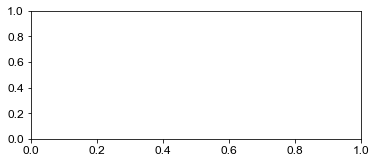

In [11]:

#Plotting
#NR
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size':12})
i=0
for st in ['NREM','REM','WA']:
    i+=1
    plt.subplot(3,2,2*i-1)
    for ngt,gt in enumerate(['WT','TG']):
        vtp1=np.mean(plotdi[st]['power'][ngt],axis=0)
        vt=frv
        etp1 = np.std(plotdi[st]['power'][ngt],axis=0)/(plotdi[st]['power'][ngt].shape[0]**0.5)
        c1=colord[gt]
        plt.plot(vt, vtp1, color=c1,label=gt)
        plt.fill_between(vt, vtp1 - etp1,
                            vtp1 + etp1, alpha=0.5, facecolor=(np.min([c1[0] + 0.5,1]), np.min([c1[1] + 0.5,1]),np.min([c1[2] + 0.4,1])))
    plt.legend()
    plt.xlabel('Frec. (Hz)',fontsize=16)
    plt.ylabel(st+' Power $(v^2)$', fontsize=16)
    sns.despine()

#Bar plots
i=0
bandn=['$\delta$','$\\theta$','$H\\theta$']
for st in ['NREM','REM','WA']:
    i+=1
    for k,feature in enumerate(list(plotdi[st].keys())[1:]):
        ax=plt.subplot(3,8,5+8*(i-1)+k)
        #power band
        ey=[np.std(plotdi[st][feature][0])/(len(plotdi[st][feature][0])**0.5),np.std(plotdi[st][feature][1])/(len(plotdi[st][feature][1])**0.5)]
        y=[np.mean(plotdi[st][feature][0]),np.mean(plotdi[st][feature][1])]

        error = [(0, 0), ey]
        bp=plt.bar([0, 1], y,yerr=error, align='center', alpha=1, ecolor='k', capsize=5)
        ax.set_xticks([0, 1], minor=False)
        vals['name']=vals.GT
        colord={'TG':(0,0,1),'WT':(0,0,0)}
        name = ['TG','WT']
        ax.set_xticklabels(name, fontsize=14)
        if k==0:
            ylb = bandn[i-1]+' Power $(V^2)$'
        if k==1:
            ylb = ' % Time '+st
        if k==2:
            ylb = ' Bout Dur. '+st+' (s)'
        if k==3:
            ylb = ' N Bouts '+ st
        for ki in range(2):
            bp[ki].set_color(colord[name[ki]])
        plt.ylabel(ylb,fontsize=16)
        
        sns.despine()
        #Unpaired T test:
        rest=stats.ttest_ind(plotdi[st][feature][0],plotdi[st][feature][1])
        sr13.statistic,sr13.pvalue
        if rest.pvalue<0.05:
            print(f"P val {st} {feature}: {rest.pvalue}, T-stat.:{rest.statistic}")
            plt.plot(0.5,np.max(y)+np.max(ey),'k*')
        
plt.tight_layout()
plt.savefig('bline_sleep_arch.pdf')  


In [ ]:
pnrdtg